In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Functions from previous steps.
def compute_work_isothermal(Vi, Vf, n, R, T):
    volume = np.linspace(Vi, Vf, 1000)
    pressure = n * R * T / volume
    work_iso = - scipy.integrate.trapezoid(pressure, volume)
    return work_iso

def compute_work_adiabatic(Vi, Vf, n, R, T, gamma):
    P_initial = n * R * T / Vi
    constant = P_initial * (Vi**gamma)
    volume = np.linspace(Vi, Vf, 1000)
    pressure = constant / (volume**gamma)
    work_adiabatic =  - scipy.integrate.trapezoid(pressure, volume)
    return work_adiabatic

In [3]:
# Assign values to the parameters
Vi = 0.1
Vf = 3 * Vi
n = 1
R = 8.314
T = 300
gamma = 1.4

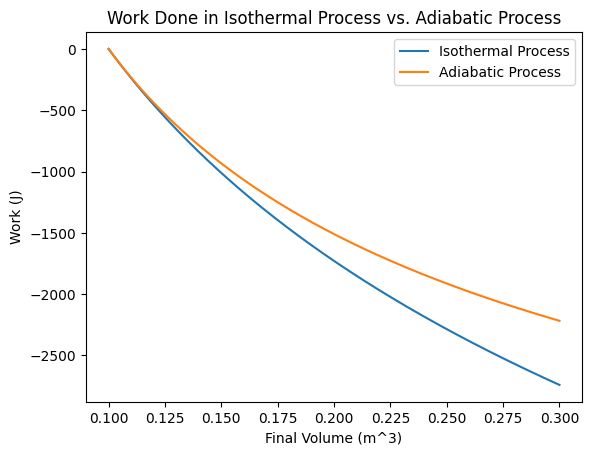

In [4]:
volumes = np.linspace(Vi, Vf, 1000) # final volumes

# Compute works done in isothermal or adiabatic process for different final volumes
work_isothermal = [compute_work_isothermal(Vi, Vf, n, R, T) for Vf in volumes]
work_adiabatic = [compute_work_adiabatic(Vi, Vf, n, R, T, gamma) for Vf in volumes]

# Plot the figure: Final Volume vs. Work
plt.plot(volumes, work_isothermal, label='Isothermal Process')
plt.plot(volumes, work_adiabatic, label='Adiabatic Process')

plt.xlabel('Final Volume (m^3)')
plt.ylabel('Work (J)')
plt.title('Work Done in Isothermal Process vs. Adiabatic Process')
plt.legend()
plt.show()


In [5]:
# Export csv file 
data = pd.DataFrame({
    'Final Volume (m^3)': volumes,
    'Work Done in Isothermal Process (J)': work_isothermal,
    'Work Done in Adiabatic Process (J)': work_adiabatic
})

data.to_csv('work_vs_final_volume.csv')